# Mid term group work

analyse overtime
across categories
both exploration and presentation style

1. the general tendency of the focal variable over time (e.g., the
   trajectory of popularity of the average 'pop' album);
2. the distribution of the focal variable at multiple points in time;
3. the evolution of the focal variable for specific cases (e.g.,
   specific products);
4. the differences/similarities in 1, 2, and 3 across categories of
   entities (e.g., types of products).

the trajectory in the count of ratings received by product across time 
      (since the very first score up to six months later; exclude products whose 
      first score has been posted by less than six months);
  - the association between the trajectory in the count of ratings and 
      product attributes (e.g., product-market category, price);
  - the association between the trajectory in the count of ratings and 
      the timing/pace with which ratings are posted.

The **audience** for this chart is a team of experienced marketing
analysts who want to understand how/why attention (measured in terms of count of
ratings) develops around new products.  The chart is meant to serve both
exploration and presentations goals – analysts will use it (i) to
speculate about the factors that account for the trajectory in the
count of ratings; (ii) to update their client with a PowerPoint alike
slide-show.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('fivethirtyeight')

<b> Review </b>
- <i>reviewerID </i> - ID of the reviewer, e.g. A2SUAM1J3GNN3B

- <i>asin</i> - ID of the product, e.g. 0000013714
- <i>reviewerName</i> - name of the reviewer
- <i>helpful</i> - helpfulness rating of the review, e.g. 2/3
- <i>reviewText</i> - text of the review
- <i>overall</i> - rating of the product
- <i>summary</i> - summary of the review
- <i>unixReviewTime</i> - time of the review (unix time)
- <i>reviewTime</i> - time of the review (raw)

<b> Metadata </b>
- <i>asin</i> - ID of the product, e.g. 0000031852
- <i>title</i> - name of the product
- <i>price</i> - price in US dollars (at time of crawl)
- <i>imUrl</i> - url of the product image
- <i>related</i> - related products (also bought, also viewed, bought together, buy after viewing)
- <i>salesRank</i> - sales rank information
- <i>brand</i> - brand name
- <i>categories</i> - list of categories the product belongs to

In [2]:
##unzip json.gz to json file

#import sh
#sh.gunzip("meta_Digital_Music.json.gz")
#sh.gunzip("Digital_Music.json.gz")

# Video Games

In [3]:
Rev = 'Video_Games.json'
Review = pd.io.json.json_normalize([json.loads(line) for line in open(Rev)])

In [4]:
Review.head(10).T

,0,1,2,3,4,5,6,7,8,9
overall,1,3,4,1,4,5,3,5,5,5
verified,True,True,True,True,True,True,True,False,True,False
reviewTime,"06 9, 2014","05 10, 2014","02 7, 2014","02 7, 2014","01 16, 2014","01 7, 2014","10 22, 2013","10 21, 2013","10 29, 2012","02 8, 2010"
reviewerID,A21ROB4YDOZA5P,A3TNZ2Q5E7HTHD,A1OKRM3QFEATQO,A2XO1JFCNEYV3T,A19WLPIRHD15TH,A1TLA7XXSZMTS7,A3I9GK5OO42B0I,A3TPP95Y9DH3L9,A19GOZTT15KPG1,A1441WFJ5KRP7J
asin,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673
reviewerName,Mary M. Clark,Sarabatya,Amazon Customer,ColoradoPartyof5,Karen Robinson,lori smith,Edwin Grabill,MollyMoore,Dovie,Zoe
reviewText,I used to play this game years ago and loved i...,The game itself worked great but the story lin...,I had to learn the hard way after ordering thi...,The product description should state this clea...,I would recommend this learning game for anyon...,Choose your career which sets your money for t...,Would like it more if they had at least update...,It took a few hours to get this up and running...,I oredered this for a daughter who is now 33 a...,Well I thought since this idem didn't have any...
summary,Did not like this,Almost Perfect,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,does not work on Mac OSX,Roughing it,Love this game! Fun and educational.,Would like it more if they had at least update...,Off to a rough start but once it got going the...,The Oregon Trail--5th Edition,Great game but why do the rattle snakes love me?
unixReviewTime,1402272000,1399680000,1391731200,1391731200,1389830400,1389052800,1382400000,1382313600,1351468800,1265587200
vote,NaN,NaN,15,11,NaN,2,2,NaN,3,NaN


In [5]:
Review.loc[:,'timestamp'] = pd.to_datetime(
    Review['reviewTime'],
    format = '%m %d, %Y'
)

In [6]:
Review.loc[:,'month'] = Review['timestamp'].dt.month
Review.loc[:,'year'] = Review['timestamp'].dt.year

Review.loc[:,'count'] = 1

In [7]:
gr_year = Review.groupby('year')
gr_asin = Review.groupby('asin')

In [8]:
Z = pd.DataFrame(gr_year['count'].agg(np.sum))

In [9]:
Z = Z['count']
Z

year
1997         5
1998         4
1999       935
2000      9963
2001     23073
2002     28506
2003     25565
2004     24938
2005     25525
2006     24538
2007     43701
2008     68145
2009     80698
2010     75709
2011     89368
2012    125290
2013    244725
2014    348814
2015    464848
2016    451521
2017    283319
2018    126159
Name: count, dtype: int64

In [10]:
df = pd.DataFrame(gr_year['overall'].agg(np.mean))

In [11]:
df.reset_index(inplace=True)

In [12]:
df

,year,overall
0,1997,4.000000
1,1998,4.000000
2,1999,4.137968
3,2000,4.098163
4,2001,4.058120
5,2002,4.062689
6,2003,4.027577
7,2004,3.922448
8,2005,3.773751
9,2006,3.753077


In [13]:
x = df['year']
y = df['overall']

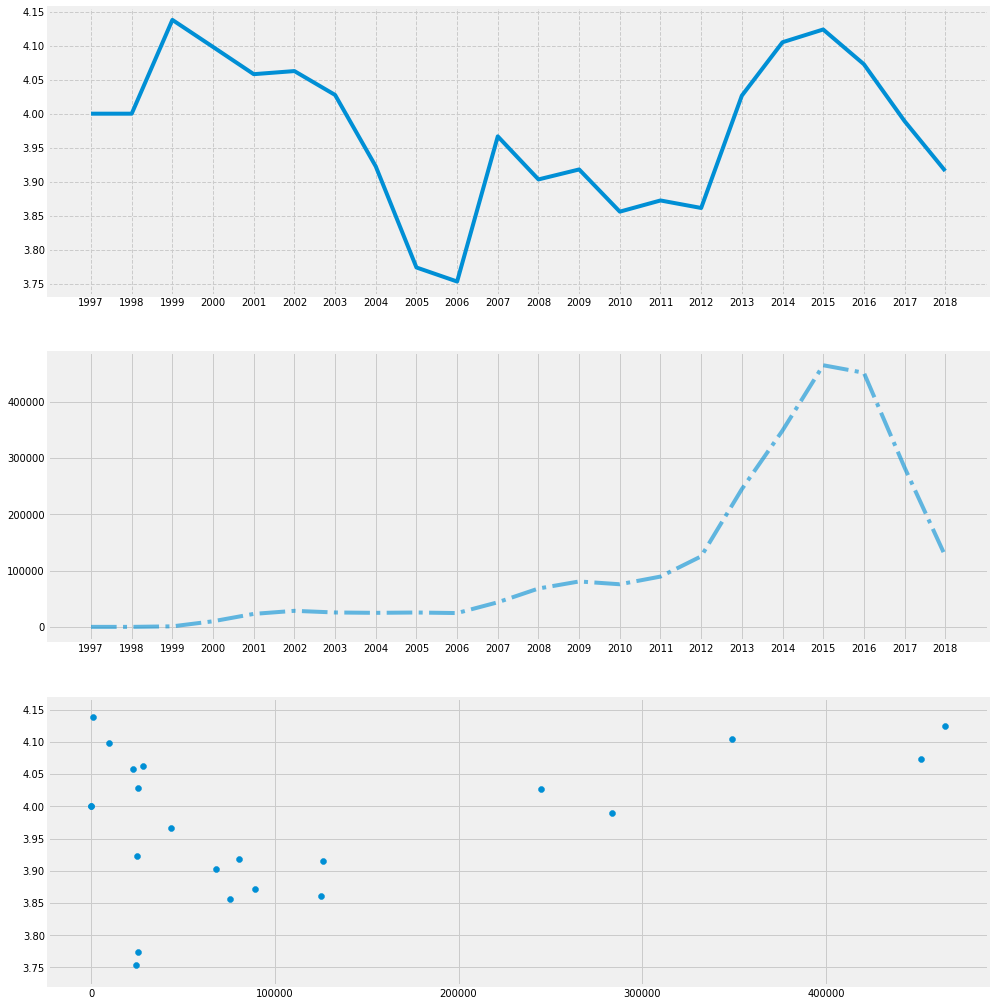

In [14]:
fig = plt.figure(figsize=(15,18))

ax = fig.add_subplot(311, xticks=x, xticklabels=x)

ax.plot(x,y)
ax.grid(ls='--')
#ax.set_ylim(0,5)


ax2 = fig.add_subplot(312, xticks=x, xticklabels=x)
ax2.plot(x,Z,alpha = 0.6,ls='-.')

ax3 = fig.add_subplot(313)
ax3.scatter(Z,y)
#ax3.set_xscale('log')

plt.show()

In [15]:
Meta = 'meta_Video_Games.json'
Metadata = pd.io.json.json_normalize([json.loads(line) for line in open(Meta)])

In [16]:
Metadata.head()

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,...,tech1.Average Battery Life,tech1.Battery Type,tech1.Handle,tech1.Sheet Size,tech1.Brightness Rating,tech1.Paper Finish,tech1.Laser Beam Color,tech1.Wattage,tech1.Luminous Flux,tech1.Caster/Glide/Wheel Type
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,[https://images-na.ssl-images-amazon.com/image...,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",Toys & Games,0042000742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Video Games, Xbox 360, Games, ]",Medal of Honor: Warfighter - Includes Battlefi...,[https://images-na.ssl-images-amazon.com/image...,by\n \n EA Games,">#67,231 in Video Games (See Top 100 in Video ...",Video Games,0078764343,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,NaN,Nintendo,">#134,433 in Video Games (See Top 100 in Video...",Video Games,0276425316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,[https://images-na.ssl-images-amazon.com/image...,by\n \n MAS SYSTEMS,">#105,263 in Video Games (See Top 100 in Video...",Video Games,0324411812,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Video Games, PC, Games, , Grades 2-12, Spelli...",Phonics Alive! 3: The Speller,[https://images-na.ssl-images-amazon.com/image...,by\n \n Advanced Software Pty. Ltd.,">#92,397 in Video Games (See Top 100 in Video ...",Video Games,0439335310,"[Phonics Alive! 3, The Speller teaches student...",NaN,[B000BCZ7U0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dict = {(i,j) for (i,j) in zip(Metadata['asin'], Metadata['main_cat'])}

In [18]:
Cat = pd.DataFrame(dict, columns=('asin','main_cat'))

In [19]:
Cat.head()

,asin,main_cat
0,B000NKRIW0,Video Games
1,B00ISOS2DC,Video Games
2,B013TOC7CM,Video Games
3,B0026LZVE6,Video Games
4,B003IME9UO,Video Games


In [20]:
Cat.set_index('asin', inplace=True)

In [21]:
Asin = pd.DataFrame([gr_asin['overall'].agg(np.mean), gr_asin['count'].agg(np.sum)]).transpose()

In [22]:
Asin

,overall,count
asin,,
0042000742,5.000000,1.0
0078764343,4.750000,4.0
0276425316,5.000000,1.0
0324411812,1.000000,1.0
0439335299,3.000000,1.0
...,...,...
B01HJ14OT0,5.000000,1.0
B01HJ14TTA,3.000000,4.0
B01HJ1521Y,5.000000,1.0


In [23]:
#outer so that there will be no, Na
DF2 = pd.merge(Asin, Cat, how="outer", on="asin")

In [24]:
DF2.reset_index(inplace=True)

In [25]:
DF2.head()

,asin,overall,count,main_cat
0,0042000742,5.00,1.0,Toys & Games
1,0078764343,4.75,4.0,Video Games
2,0276425316,5.00,1.0,Video Games
3,0324411812,1.00,1.0,Video Games
4,0439335299,3.00,1.0,Video Games


In [26]:
Cat_count = pd.DataFrame(DF2.groupby('main_cat')['count'].agg(np.sum))
Cat_overall = pd.DataFrame(DF2.groupby('main_cat')['overall'].agg(np.mean))

In [27]:
Cat_count.reset_index(inplace=True)

In [28]:
Y1 = Cat_count['count']
Y2 = Cat_overall['overall']
X = Cat_count['main_cat']

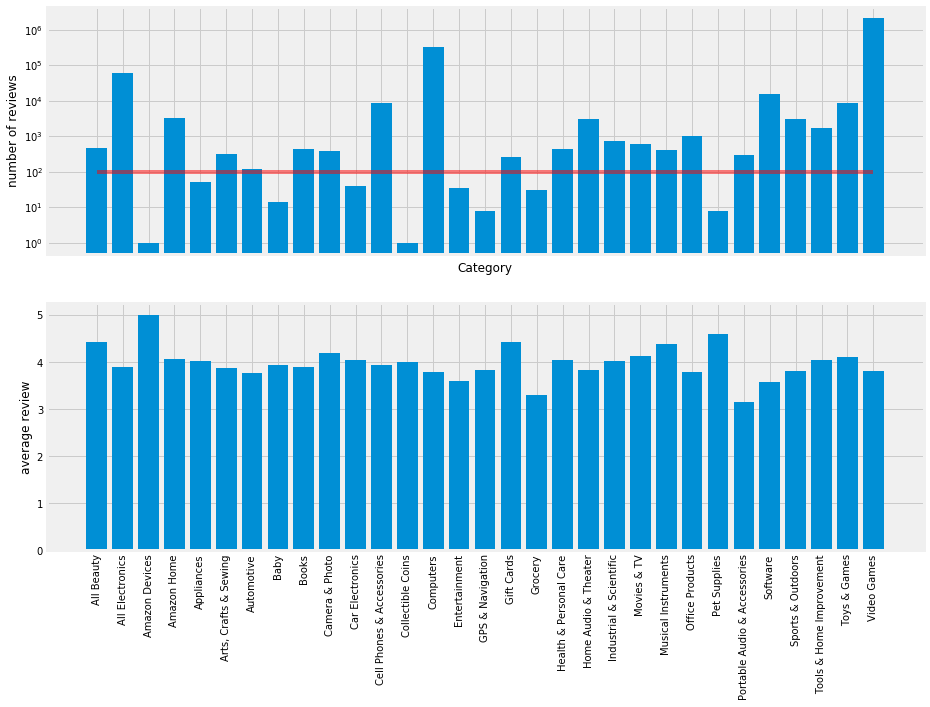

In [29]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(211)


ax.bar(X,Y1)
ax.set_yscale('log')
ax.set_xticklabels('')
ax.set_xlabel('Category')
ax.set_ylabel('number of reviews')
ax.hlines(y=100, xmin=X[0] , xmax=X[30] , colors= 'r', ls='-', alpha=0.5)

ax2 = fig.add_subplot(212)
ax2.bar(X,Y2)
ax2.set_xticklabels(X, rotation='vertical')
ax2.set_ylabel('average review')

plt.show()

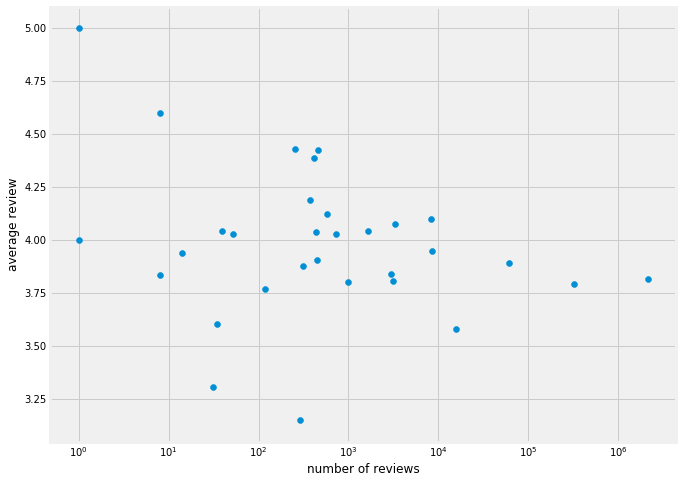

In [30]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)


ax.scatter(Y1,Y2)
ax.set_xlabel('number of reviews')
ax.set_ylabel('average review')
ax.set_xscale('log')

plt.show()

In [31]:
Metadata

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,...,tech1.Average Battery Life,tech1.Battery Type,tech1.Handle,tech1.Sheet Size,tech1.Brightness Rating,tech1.Paper Finish,tech1.Laser Beam Color,tech1.Wattage,tech1.Luminous Flux,tech1.Caster/Glide/Wheel Type
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,[https://images-na.ssl-images-amazon.com/image...,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",Toys & Games,0042000742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Video Games, Xbox 360, Games, ]",Medal of Honor: Warfighter - Includes Battlefi...,[https://images-na.ssl-images-amazon.com/image...,by\n \n EA Games,">#67,231 in Video Games (See Top 100 in Video ...",Video Games,0078764343,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,NaN,Nintendo,">#134,433 in Video Games (See Top 100 in Video...",Video Games,0276425316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,[https://images-na.ssl-images-amazon.com/image...,by\n \n MAS SYSTEMS,">#105,263 in Video Games (See Top 100 in Video...",Video Games,0324411812,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Video Games, PC, Games, , Grades 2-12, Spelli...",Phonics Alive! 3: The Speller,[https://images-na.ssl-images-amazon.com/image...,by\n \n Advanced Software Pty. Ltd.,">#92,397 in Video Games (See Top 100 in Video ...",Video Games,0439335310,"[Phonics Alive! 3, The Speller teaches student...",NaN,[B000BCZ7U0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84888,"[Video Games, PlayStation Vita, Digital Games ...",Lego Star Wars: The Force Awakens - PS Vita [D...,NaN,by\n \n Warner Bros.,">#74,224 in Video Games (See Top 100 in Video ...",Video Games,B01HJ1521Y,[The Force is strong with this one The No. 1 L...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84889,"[Video Games, PlayStation 4, Digital Games & D...",Lego Star Wars: The Force Awakens Season Pass...,NaN,by\n \n Warner Bros.,">#62,150 in Video Games (See Top 100 in Video ...",Video Games,B01HJ14TTA,[The Season Pass includes three Level Packs th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84890,"[Video Games, PlayStation 4, Digital Games & D...",The Technomancer - PS4 [Digital Code],[https://images-na.ssl-images-amazon.com/image...,by\n \n Focus Home Interactive,">#94,234 in Video Games (See Top 100 in Video ...",Video Games,B01HJ14OT0,"[The Technomancer takes you to Mars, where you...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84891,"[Video Games, Xbox 360, Accessories, ]","Repair T8 T6 Tools for XBOX One Xbox 360, YTTL...",[https://images-na.ssl-images-amazon.com/image...,by\n \n YTTL,">#16,087 in Video Games (See Top 100 in Video ...",Video Games,B01HJC33WS,[FUNCTIONS: 1.Take apart your Xbox One control...,"[B01KBNB7K2, B06X6JSYPC, B01N6Y0Z7W, B06VXD2W5...","[B01KH25ZY6, B00PG8SU26, B07G122BVS, B016XLTQP...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
Metadata.loc[:,'count'] = 1

In [33]:
B = []
for n,i in enumerate(Metadata['category']):
    if type(i) == list:
        if i[1] == 'Kids & Family':
            if len(i) > 2:
                B.append(i[2])
            elif len(i) ==2:
                B.append(i[1])
        else:
            B.append(i[1])
    else:
        B.append(i)


In [34]:
Metadata.loc[:,'cat2'] = B

In [35]:
Y = pd.DataFrame(Metadata.groupby('cat2')['count'].agg(np.sum))

Y.reset_index(inplace=True)

In [36]:
X = Y['cat2']
Y2 = Y['count']

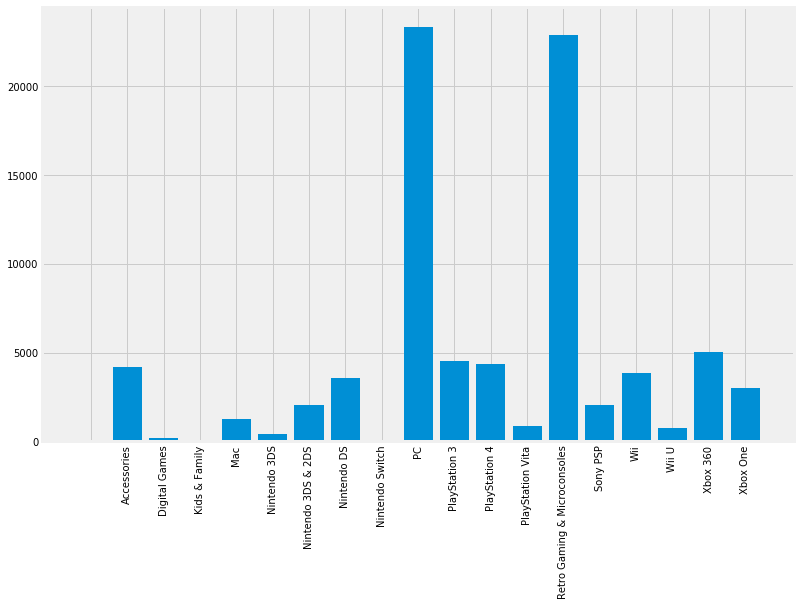

In [37]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
 
ax.bar(X,Y2)
ax.set_xticklabels(X, rotation='vertical')

plt.show() 

In [38]:
C = []
for i in B:
    if i == 'PlayStation 3':
        C.append('PlayStation')
    elif i == 'PlayStation 4':
        C.append('PlayStation')
    elif i == 'PlayStation Vita':
        C.append('PlayStation')
    elif i == 'Sony PSP':
        C.append('PlayStation')
    elif i == 'Wii U':
        C.append('Wii')
    elif i == 'Xbox 360':
        C.append('Xbox')
    elif i == 'Xbox One':
        C.append('Xbox')
    elif i == 'Nintendo 3DS':
        C.append('Nintendo')
    elif i == 'Nintendo 3DS & 2DS':
        C.append('Nintendo')
    elif i == 'Nintendo DS':
        C.append('Nintendo')
    elif i == 'Nintendo Switch':
        C.append('Nintendo')
    else:
        C.append(i)

In [39]:
C

['PC',
 'Xbox',
 'Retro Gaming & Microconsoles',
 'Xbox',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'Retro Gaming & Microconsoles',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'Xbox',
 'PlayStation',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 nan,
 'PC',
 'PC',
 'Mac',
 'Mac',
 'PC',
 'PC',
 nan,
 'PC',
 'Nintendo',
 'PC',
 'Wii',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'Nintendo',
 nan,
 'PC',
 'PC',
 'Accessories',
 'PC',
 'PC',
 'Retro Gaming & Microconsoles',
 'PC',
 'PC',
 'PC',
 'PlayStation',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 nan,
 'PC',
 'Accessories',
 'Accessories',
 'PC',
 'PC',
 'Nintendo',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 'PC',
 nan,
 'Retro Gaming & Microconsoles',
 'PC',
 'PlayStation',
 nan,
 'Retro Gaming & Microconsoles',
 'Wii',
 'Wii',
 'Accessories',
 'PlayS

In [40]:
Metadata.loc[:,'cat2'] = C

In [41]:
Y = pd.DataFrame(Metadata.groupby('cat2')['count'].agg(np.sum))

Y.reset_index(inplace=True)

In [42]:
X = Y['cat2']
Y2 = Y['count']

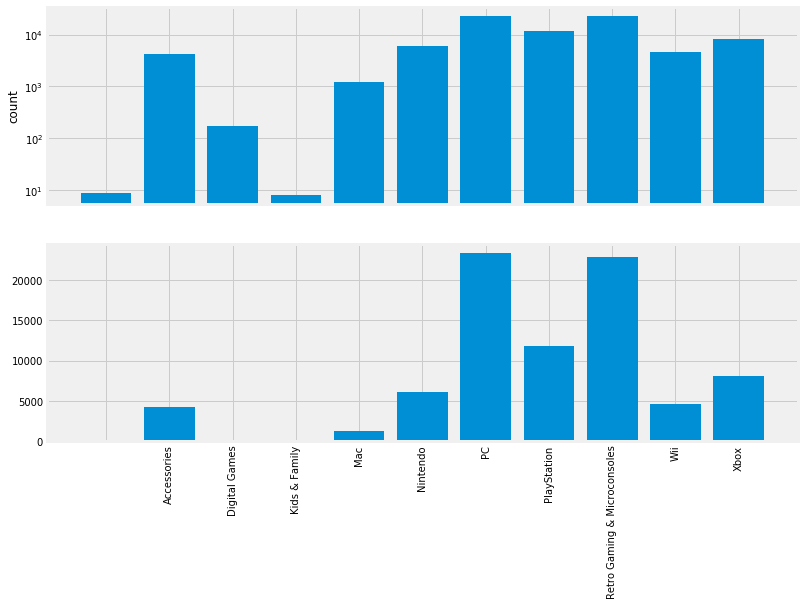

In [43]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(211)
 
ax.bar(X,Y2)
ax.set_xticklabels(X, rotation='vertical')
ax.set_yscale('log')
ax.set_xticklabels('')
ax.set_ylabel('count')

ax2 = fig.add_subplot(212)
 
ax2.bar(X,Y2)
ax2.set_xticklabels(X, rotation='vertical')
ax2.set_ylabel('')


plt.show() 

In [44]:
Metadata.head().T

,0,1,2,3,4
category,"[Video Games, PC, Games]","[Video Games, Xbox 360, Games, ]","[Video Games, Retro Gaming & Microconsoles, Su...","[Video Games, Xbox 360, Accessories, Controlle...","[Video Games, PC, Games, , Grades 2-12, Spelli..."
title,Reversi Sensory Challenger,Medal of Honor: Warfighter - Includes Battlefi...,street fighter 2 II turbo super nintendo snes ...,Xbox 360 MAS STICK,Phonics Alive! 3: The Speller
image,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
brand,Fidelity Electronics,by\n \n EA Games,Nintendo,by\n \n MAS SYSTEMS,by\n \n Advanced Software Pty. Ltd.
rank,">#2,623,937 in Toys & Games (See Top 100 in To...",">#67,231 in Video Games (See Top 100 in Video ...",">#134,433 in Video Games (See Top 100 in Video...",">#105,263 in Video Games (See Top 100 in Video...",">#92,397 in Video Games (See Top 100 in Video ..."
...,...,...,...,...,...
tech1.Wattage,NaN,NaN,NaN,NaN,NaN
tech1.Luminous Flux,NaN,NaN,NaN,NaN,NaN
tech1.Caster/Glide/Wheel Type,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1


In [45]:
df = pd.merge(Review[['asin','overall','verified','timestamp','month','year','count','reviewerID', 'vote']],Metadata[['asin','cat2', 'rank']],how='left')

In [46]:
df.tail(20)

,asin,overall,verified,timestamp,month,year,count,reviewerID,vote,cat2,rank
2848226,B01HJC33WS,3.0,True,2018-09-07,9,2018,1,A2DAC7YGID7LJ1,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848227,B01HJC33WS,5.0,True,2018-05-04,5,2018,1,A253KO467WHNEJ,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848228,B01HJC33WS,5.0,True,2018-03-25,3,2018,1,A1W7F81T5YRVL1,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848229,B01HJC33WS,5.0,True,2018-03-06,3,2018,1,AFNAMLSB7WICC,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848230,B01HJC33WS,5.0,True,2017-11-28,11,2017,1,A2M64DCSJEU4PG,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848231,B01HJC33WS,5.0,True,2017-10-01,10,2017,1,AHXPZZ4EVLD86,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848232,B01HJC33WS,5.0,True,2017-07-24,7,2017,1,A1GSJ5V83M1N72,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848233,B01HJC33WS,5.0,True,2017-06-17,6,2017,1,A268Z8CJAA1SGU,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848234,B01HJC33WS,5.0,True,2017-04-21,4,2017,1,AWPZHCSCNTXB3,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."
2848235,B01HJC33WS,5.0,True,2017-04-16,4,2017,1,A2T8IWOK28R042,NaN,Xbox,">#16,087 in Video Games (See Top 100 in Video ..."


In [47]:
df.to_csv('final.csv', index=False)